In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay, ValidationCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
data_train = pd.read_csv('/Users/solovyev_na/Desktop/Jupyter/Titanic/train.csv')
data_test = pd.read_csv('/Users/solovyev_na/Desktop/Jupyter/Titanic/test.csv')

In [9]:
#info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data_train.describe().mean()

PassengerId    478.044230
Survived       111.733804
Pclass         113.268089
Age            115.596327
SibSp          112.703219
Parch          112.273456
Fare           192.323930
dtype: float64

In [1022]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1023]:
#Очистка пропусков и замена на медианные значения
def prepocess(df):
     df['Age'] = df['Age'].fillna(df['Age'].median())
     df['Fare'] = df['Fare'].fillna(df['Fare'].median())
     df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
     
     emb_map = {'S': 1, 'C': 2, 'Q': 3} 
     df['Embarked'] = df['Embarked'].map(emb_map)
     df['Embarked'] = df['Embarked'].fillna(df['Embarked'].median())
     df['Embarked'] = df['Embarked'].astype(int)

prepocess(data_train)
prepocess(data_test)

In [1024]:
def func_alone(df):
    df["Alone"] = np.where(df["Parch"] | df['SibSp'] >= 1, 0, 1)

func_alone(data_train)
func_alone(data_test)

In [1025]:
def fam_size(df):
    df["FamilySize"] = df["Parch"] + df['SibSp'] +1

fam_size(data_train)
fam_size(data_test)

In [1026]:
def ageCategory(df):
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age'] = 4
    df['Age'] = df['Age'].astype(int)
ageCategory(data_train)
ageCategory(data_test)

In [1027]:
def fare(df):
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
fare(data_test)
fare(data_train)

In [1028]:
def agePclass(df):
    df['Age*Class'] = df.Age * df.Pclass
    df['Age*Class'] = df['Age*Class'].astype(int)
agePclass(data_test)
agePclass(data_train)

In [1029]:
data_train = data_train.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)
data_test = data_test.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)

In [1030]:
data_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,FamilySize,Age*Class
0,1,0,3,1,1,0,1,0,2,3
1,2,1,1,0,2,3,2,0,2,2
2,3,1,3,0,1,1,1,1,1,3
3,4,1,1,0,2,3,1,0,2,2
4,5,0,3,1,2,1,1,1,1,6
5,6,0,3,1,1,1,3,1,1,3
6,7,0,1,1,3,3,1,1,1,3
7,8,0,3,1,0,2,1,0,5,0
8,9,1,3,0,1,1,1,0,3,3
9,10,1,2,0,0,2,2,0,2,0


In [1031]:
data_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone,FamilySize,Age*Class
0,892,3,1,2,0,3,1,1,6
1,893,3,0,2,0,1,0,2,6
2,894,2,1,3,1,3,1,1,6
3,895,3,1,1,1,1,1,1,3
4,896,3,0,1,1,1,0,3,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,1,1,1,1,3
414,1306,1,0,2,3,2,1,1,2
415,1307,3,1,2,0,1,1,1,6
416,1308,3,1,1,1,1,1,1,3


In [1032]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Alone          0
FamilySize     0
Age*Class      0
dtype: int64

In [1033]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Alone          0
FamilySize     0
Age*Class      0
dtype: int64

In [1034]:
data_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,FamilySize,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,1.290685,1.505051,1.361392,0.602694,1.904602,2.736251
std,257.353842,0.486592,0.836071,0.477990,0.812620,1.118148,0.635673,0.489615,1.613459,1.777835
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,2.000000
50%,446.000000,0.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,3.000000,3.000000,1.000000,11.000000,12.000000


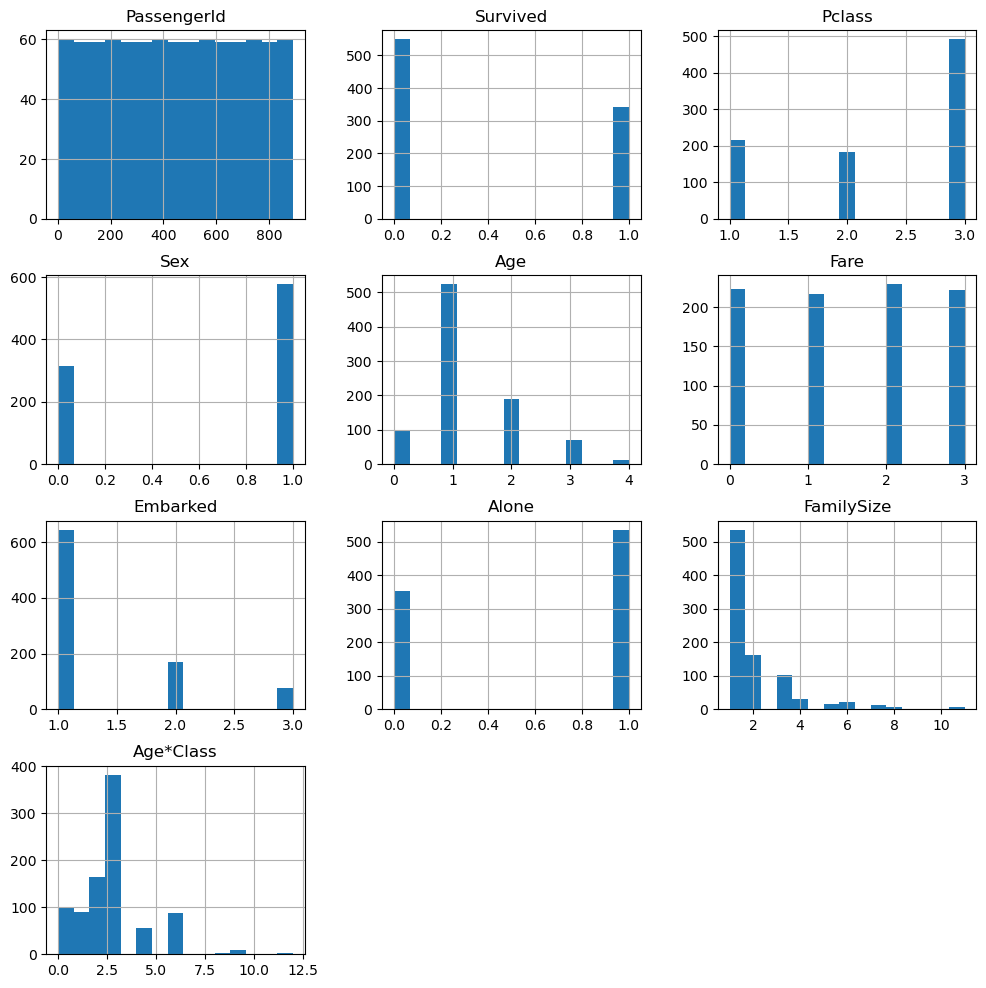

In [1035]:
#EDA
data_train.hist(bins=15,figsize=(12, 12))
plt.show()

<Axes: ylabel='count'>

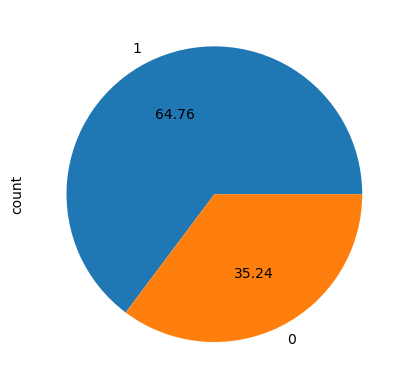

In [1036]:
data_train['Sex'].value_counts().plot.pie(autopct='%0.2f')

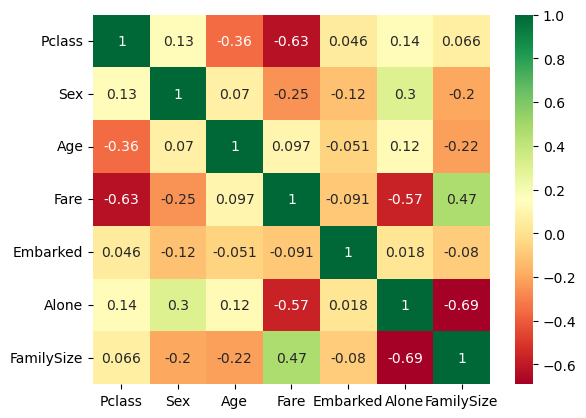

In [1037]:
numerical_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Alone', 'FamilySize']
correlation_matrix = data_train[numerical_cols].corr()
sns.heatmap(correlation_matrix, cmap = 'RdYlGn', annot = True)
plt.show()

In [1038]:
X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']
X_test = data_test.drop(['PassengerId'], axis=1)

In [1039]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Alone,FamilySize,Age*Class
0,3,1,2,0,3,1,1,6
1,3,0,2,0,1,0,2,6
2,2,1,3,1,3,1,1,6
3,3,1,1,1,1,1,1,3
4,3,0,1,1,1,0,3,3
...,...,...,...,...,...,...,...,...
413,3,1,1,1,1,1,1,3
414,1,0,2,3,2,1,1,2
415,3,1,2,0,1,1,1,6
416,3,1,1,1,1,1,1,3


In [1040]:
X

,Pclass,Sex,Age,Fare,Embarked,Alone,FamilySize,Age*Class
0,3,1,1,0,1,0,2,3
1,1,0,2,3,2,0,2,2
2,3,0,1,1,1,1,1,3
3,1,0,2,3,1,0,2,2
4,3,1,2,1,1,1,1,6
...,...,...,...,...,...,...,...,...
886,2,1,1,1,1,1,1,2
887,1,0,1,2,1,1,1,1
888,3,0,1,2,1,0,4,3
889,1,1,1,2,2,1,1,1


In [1041]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_val.shape)

(712, 8) (179, 8)


In [1042]:
clf_gb = GradientBoostingClassifier()

In [1060]:
params = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [1, 10, 100, 300, 500], 'max_depth': [1,3,5,7]}

In [1061]:
grid_gb = GridSearchCV(estimator=clf_gb, param_grid=params, cv=5)

In [1062]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=500),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [1, 10, 100, 300, 500]})

In [1063]:
best_gb = grid_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [1064]:
clf_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)

In [1065]:
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [1066]:
y_val_xgb = clf_gb.predict(X_val)

In [1067]:
y_val_acc_xgb = accuracy_score(y_val, y_val_xgb)
y_val_acc_xgb

0.8100558659217877

In [1068]:
cv_scores_xgb = cross_val_score(clf_gb, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores_xgb):}")

Cross-Validation Accuracy: 0.8103320569957944


In [1069]:
y_test_pred = clf_gb.predict(X_test)

In [1070]:
test_pass_id = data_test['PassengerId']

In [1071]:
submission = pd.DataFrame({
    "PassengerId": test_pass_id,
    "Survived": y_test_pred.astype(int)
})
submission.to_csv("gender_submission.csv", index=False)
print("Submission file created successfully!")

Submission file created successfully!
